<a href="https://colab.research.google.com/github/cypherkrish/PythonDataScience-Exercises/blob/main/02_Session_Data_Visualisation_DS_fig06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [3]:
dfm = pd.read_csv('https://raw.githubusercontent.com/cypherkrish/PythonDataScience/main/Data/matchs.csv')
dfd = pd.read_csv('https://raw.githubusercontent.com/cypherkrish/PythonDataScience/main/Data/deliveris.csv')

Draw a scatter plot on strike rate progression of batsmen with respect to balls faced .
- Along with this plot add two more line plots on the same plot representing minimum and maximum strikerate         progressions with respect to balls faced
- Formula for Strike Rate calculation - (Batsmen Runs per match / balls faced) * 100
Expected Plot


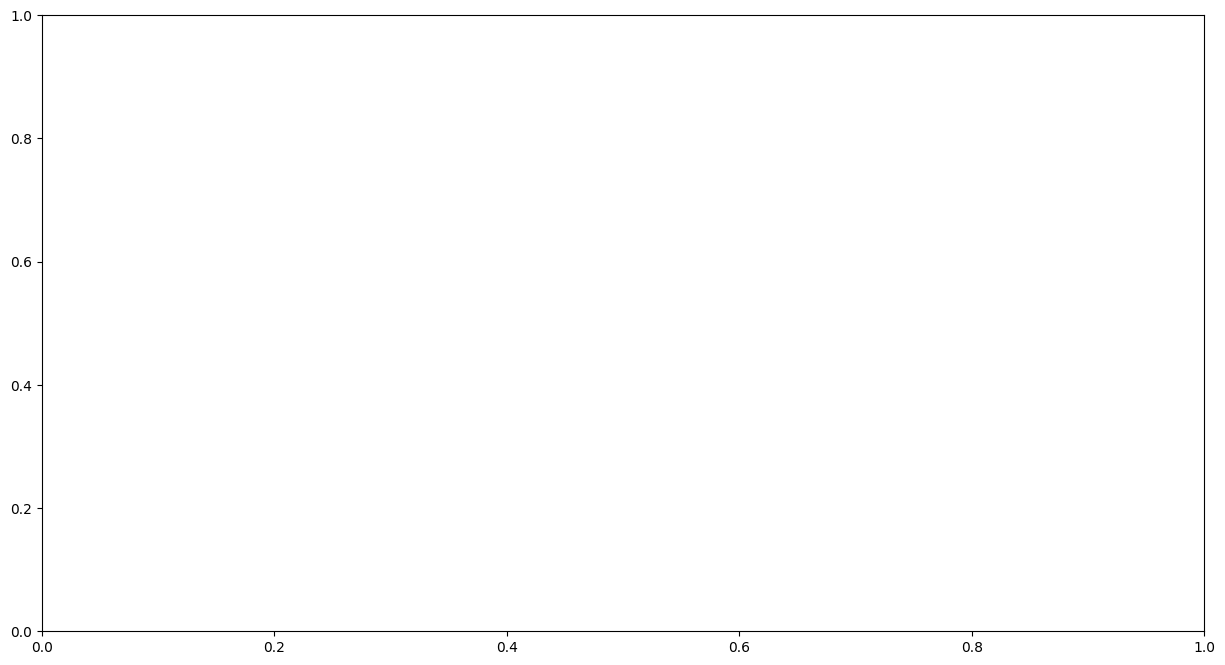

In [3]:
fig6,ax6=plt.subplots(figsize=(15,8))
###Start code here

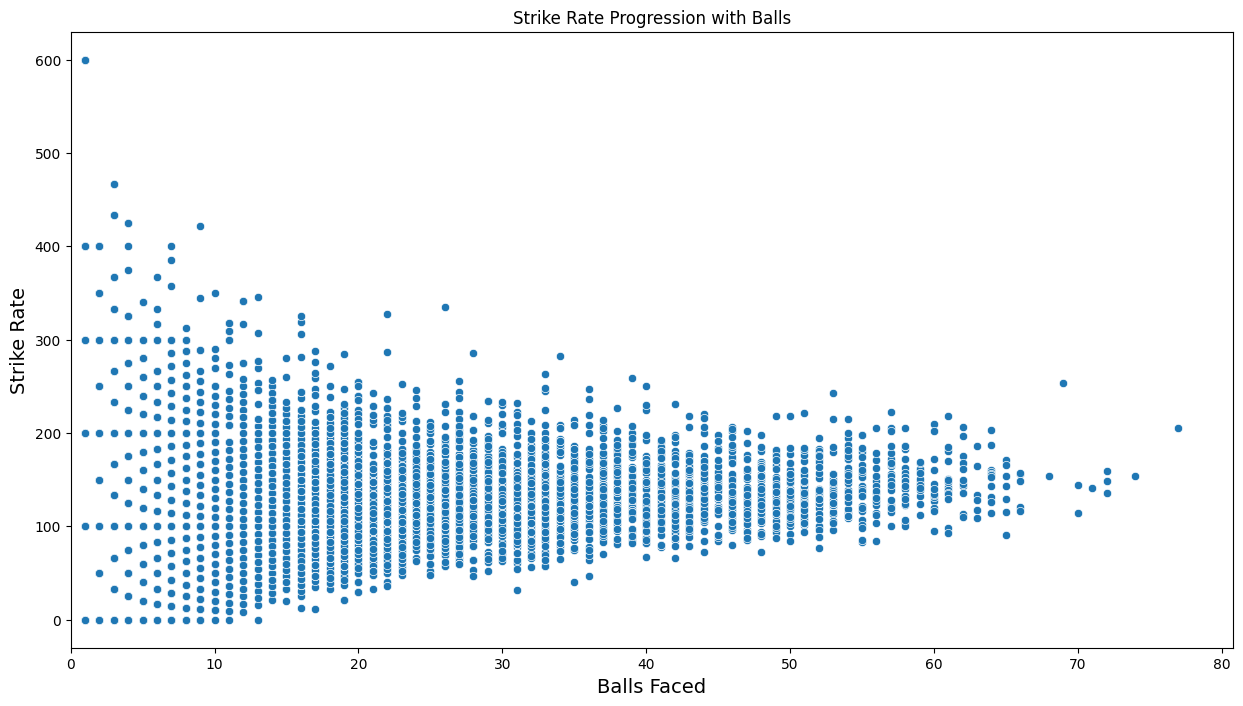

In [9]:
fig6,ax6=plt.subplots(figsize=(15,8))
###Start code here

data_ballsFaced_RunsScored = dfd.groupby(['match_id', 'batsman'])[['ball', 'batsman_runs']].agg(['size', 'sum']).reset_index()
dic = {}
balls_faced = list(data_ballsFaced_RunsScored['ball']['size'])
runs_scored = list (data_ballsFaced_RunsScored['batsman_runs']['sum'])
dic['match_id'] = list(data_ballsFaced_RunsScored['match_id'])
dic['batsman'] = list(data_ballsFaced_RunsScored['batsman'])
dic['balls_faced'] = balls_faced
dic['runs_scored'] = runs_scored
result = pd.DataFrame(dic)
result['StrikeRate'] = result['runs_scored'] *  100 / result['balls_faced']

result_max_strike = result.groupby('balls_faced').max('StrikeRate').reset_index()
result_max_strike.columns = ['balls_faced', 'match_id', 'runs_scored', 'Max_StrikeRate']
result_min_strike = result.groupby('balls_faced').min('StrikeRate').reset_index()
result_min_strike.columns = ['balls_faced', 'match_id', 'runs_scored', 'Min_StrikeRate']
result_new = pd.merge(result, result_max_strike, on="balls_faced", how="left")
result_new = pd.merge(result_new, result_min_strike, on="balls_faced", how="left")
sns.scatterplot(data=result_new, x="balls_faced", y="StrikeRate")

#ball_count_range = np.linspace(result_new['balls_faced'].min(), result_new['balls_faced'].max(), 100)


#result_max_strike['Max_StrikeRate'].plot.line()
#result_min_strike['Min_StrikeRate'].plot.line()
#ax6.plot.line(result_max_strike['Max_StrikeRate'], color='green', label='Max Strike Rate', linewidth=2)
#ax6.plot.line(result_min_strike['Min_StrikeRate'], color='red', label='Min Strike Rate', linewidth=2)

#ax6.plot(result_new.groupby('balls_faced').max('StrikeRate'), color='green', label='Max Strike Rate Progression', linewidth=2)
#ax6.plot(result_new.groupby('balls_faced').min('StrikeRate'), color='red', label='Max Strike Rate Progression', linewidth=2)
#ax6.plot(result_new['Max_StrikeRate'], color='red', label='Min Strike Rate Progression', linewidth=2)


#ax5.scatter(result_filter['ball'], result_filter['batsman_runs'])#, color='blue', s=5)
ax6.set_title('Strike Rate Progression with Balls') #, fontsize=16)
ax6.set_xlim(10,)
ax6.set_xlabel('Balls Faced', fontsize=14)
ax6.set_ylabel('Strike Rate', fontsize=14)
ax6.set_xlim(0,)
plt.show()

In [23]:
result_new

,match_id_x,batsman,balls_faced,runs_scored_x,StrikeRate,match_id_y,runs_scored_y,Max_StrikeRate,match_id,runs_scored,Min_StrikeRate
0,1,A Choudhary,2,6,300.000000,11415,8,400.000000,1,0,0.000000
1,1,BCJ Cutting,6,16,266.666667,11414,22,366.666667,1,0,0.000000
2,1,CH Gayle,23,32,139.130435,11347,58,252.173913,1,11,47.826087
3,1,DA Warner,9,14,155.555556,11414,38,422.222222,1,0,0.000000
4,1,DJ Hooda,12,16,133.333333,11414,41,341.666667,1,1,8.333333
...,...,...,...,...,...,...,...,...,...,...,...
11289,11415,RD Chahar,2,0,0.000000,11415,8,400.000000,1,0,0.000000
11290,11415,RG Sharma,14,15,107.142857,11415,36,257.142857,5,3,21.428571
11291,11415,SK Raina,15,9,60.000000,11415,42,280.000000,2,3,20.000000
11292,11415,SN Thakur,2,2,100.000000,11415,8,400.000000,1,0,0.000000


<Axes: >

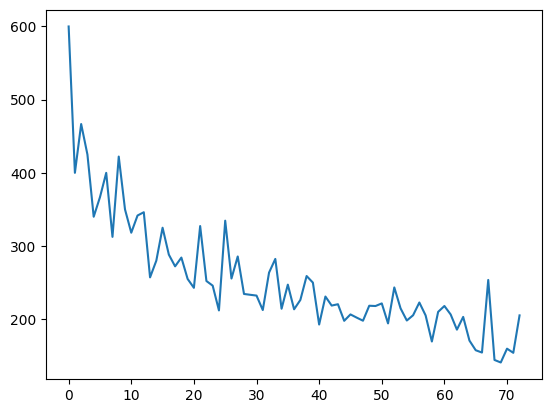

In [17]:
result_max_strike['Max_StrikeRate'].plot.line()

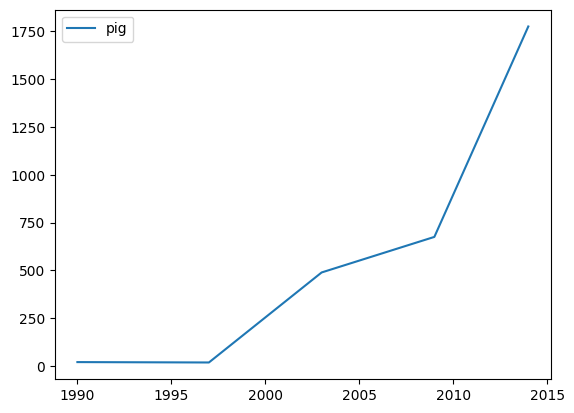

In [15]:
df = pd.DataFrame({
   'pig': [20, 18, 489, 675, 1776],
   #'horse': [4, 25, 281, 600, 1900]
   }, index=[1990, 1997, 2003, 2009, 2014])
lines = df.plot.line()